## t-test tutorial

Copyright 2020 by Joshua I. Gold, University of Pennsylvania

In [ ]:
import platform

# Output on system used for development/testing:
# 3.9.2
print(platform.python_version())

# Uncomment and run to clear workspace
# %reset

### One-sample t-test for H0:mean=0

In [11]:
import numpy as np
import scipy.stats as st

# Define the population distribution
mu = 1
sigma = 1

# Get random samples
N = 10
X = np.random.normal(mu, sigma, N)

# Compute the sample mean
X_bar = X.mean()

# Compute the sample std
S_bar = np.sqrt((1/(N-1))*np.sum((X-X_bar)**2)) # same as S = X.std(ddof=1);

# Compute the t-statistic 
t = X_bar*np.sqrt(N)/S_bar

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p = 2.*(1-st.t.cdf(t, N-1))

# Compare to what we get from ttest_1samp
tstat, pval = st.ttest_1samp(X, 0)

print(f't = {t:.4f} (computed) {tstat:.4f} (from ttest_1samp)')
print(f'p = {p:.4f} (computed) {pval:.4f} (from ttest_1samp)')

t = 3.5284 (computed) 3.5284 (from ttest_1samp)
p = 0.0064 (computed) 0.0064 (from ttest_1samp)


### Two-sample paired t-test for H0: equal means


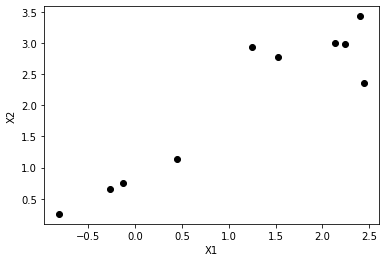

variance=0.2014 (python function), 0.2014 (computed)
t = 6.4064 (computed) 6.4064 (from ttest)
p = 0.0001 (computed) 0.0001 (from ttest)


In [19]:
import matplotlib.pyplot as plt

# Define paired measurements in terms of a difference and then additive 0-mean noise
mu          = 1
sigma       = 1
mu_diff     = 1
mu_noise    = 0
sigma_noise = 0.5

# Get random samples
N = 10
X1 = np.random.normal(mu, sigma, N)
X2 = X1 + mu_diff + np.random.normal(mu_noise, sigma_noise, N)

# Compute the difference
D = X2 - X1

# Note that X1 and X2 are highly correlated (see figure), so the variance (or std) of the difference needs to take into account the covariance
# var(X2 - X1) = cov(X2 - X1, X2 - X1)
#              = cov(X2, X2) + cov(X1, X1) - cov(X2, X1) - cov(X1, X2)
#              = var(X2) + var(X1) - cov(X2,X1) - cov(X1,X2)
plt.plot(X1, X2, 'ko', markerfacecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
cov = np.cov(X1, X2)
print(f'variance={cov[0,0]+cov[1,1]-cov[0,1]-cov[1,0]:.4f} (computed), {D.var(ddof=1):.4f} (python function)')

# Compute the t-statistic 
t_D = D.mean()*np.sqrt(N)/D.std(ddof=1)

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_D = 2.*(1-st.t.cdf(t_D, N-1))

# Compare to what we get from ttest
tstat, pval = st.ttest_1samp(D, 0)

print(f't = {t_D:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_D:.4f} (computed) {pval:.4f} (python function)')


### Two-sample unpaired t-test for H0: equal means

In [21]:
# Define unpaired measurements, same sigma
mu_1 = 1
mu_2 = 2
sigma = 1

# Get random samples, same n
N = 10
X1 = np.random.normal(mu_1, sigma, N)
X2 = np.random.normal(mu_2, sigma, N)

# Compute test statistic
Sp = np.sqrt((X1.var(ddof=1) + X2.var(ddof=1))/2)
t_U = (X1.mean()-X2.mean())/(Sp*np.sqrt(2/N))

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_U = 2.*(1-st.t.cdf(abs(t_U), 2*N-2))

# Compare to what we get from ttest (use ttest_ind for two independent samples)
tstat, pval = st.ttest_ind(X1, X2)

print(f't = {t_U:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_U:.4f} (computed) {pval:.4f} (python function)')

t = -3.4513 (computed) -3.4513 (from ttest)
p = 0.0028 (computed) 0.0028 (from ttest)
